In [1]:
import pkgutil
import physioex

print([module.name for module in pkgutil.iter_modules(physioex.__path__)])


['physioex', 'setup']


In [ ]:
from physioex.data import PhysioExDataset

data = PhysioExDataset(
    datasets = ["hmc"],
    preprocessing = "xsleepnet",    # can be "raw" also because the Preprocessor 
                                    # will always save also the raw data
    selected_channels = ["EEG", "EOG", "EMG", "ECG"], # in case you want to read 
                                                      # all the channels available
    data_folder = "./data/hmc",
)

# you can now access any sequence of epochs in the dataset

signal, label = data[0]

signal.shape # will be [21 (default sequence lenght), 4, 29, 129]
label.shape # will be [21]

### Read file and plot eeg signal

In [1]:
# imports
import pywt
import pyedflib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

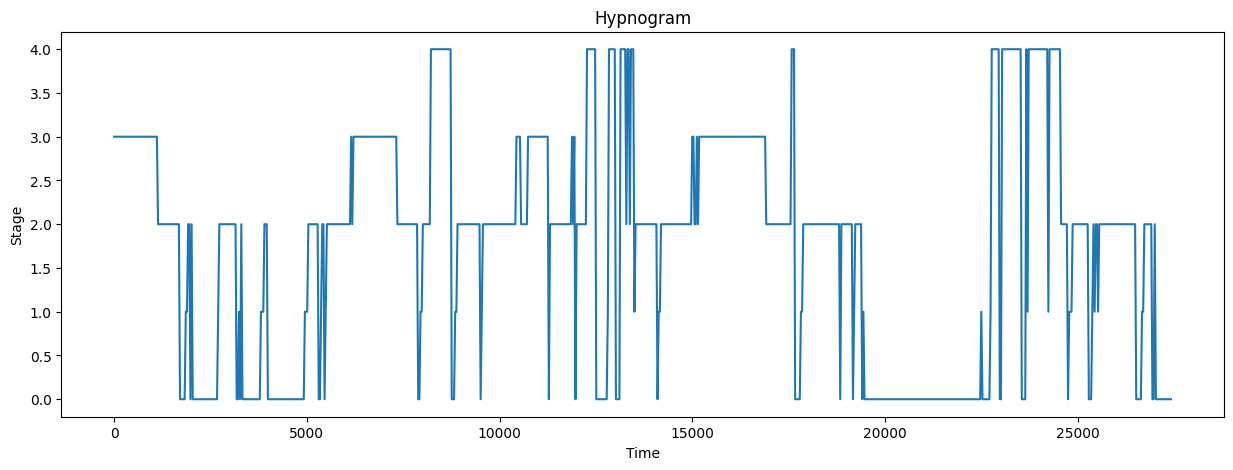

In [8]:
# read tvs hypnogram
hypnogram = pd.read_csv("/Users/alicia/Documents/Master/TFM/learnable-masks-explainability-time-series/data/bitbrain/sub-1/eeg/sub-1_task-Sleep_acq-psg_events.tsv", sep="\t", header=0)
hypnogram.head()
# hypnogram["Time"] = pd.to_datetime(hypnogram["Time"], format="%H:%M:%S")
# hypnogram["Time"] = hypnogram["Time"].dt.time

# plot hypnogram
plt.figure(figsize=(15, 5))
plt.plot(hypnogram["onset"], hypnogram["ai_psg"])
plt.xlabel("Time")
plt.ylabel("Stage")
plt.title("Hypnogram")
plt.show()


In [3]:
# Function to read and plot an EDF signal
def plot_eeg_signals(edf_file):
    """
    Reads an EDF file and plots a specified channel in the time domain.

    :param edf_file: Path to the EDF file
    """
    signals = []

    # Open the EDF file
    with pyedflib.EdfReader(edf_file) as f:
        num_signals = f.signals_in_file  # Number of signals in file
        signal_labels = f.getSignalLabels()  # Get channel names

        # Read all the signals
        for i in range(num_signals):
            fs = f.getSampleFrequency(i)
            signal = f.readSignal(i)
            signals.append(signal)

        print(f"Number of signals {num_signals}")
        print(f"Signal labels: {signal_labels}")

    # Generate time vector assuming sampling frequency is the same for all channels
    total_samples = len(signal)
    total_time = total_samples / fs  # Total duration in seconds
    print(f"total time {total_time}")
    time = np.linspace(0, total_time, total_samples)

    # plot the different signals in the same plot with different colors
    plt.figure(figsize=(10, 4))

    for i, signal in enumerate(signals):
        plt.plot(time, signal, label=signal_labels[i])

    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.title("EDF Signal")
    plt.legend()
    plt.show()

Number of signals 11
Signal labels: ['PSG_F3', 'PSG_F4', 'PSG_C3', 'PSG_C4', 'PSG_O1', 'PSG_O2', 'PSG_EOG', 'PSG_EMG', 'PSG_THER', 'PSG_THOR', 'PSG_ABD']
total time 27459.0


/Users/alicia/Documents/Master/TFM/learnable-masks-explainability-time-series/.env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


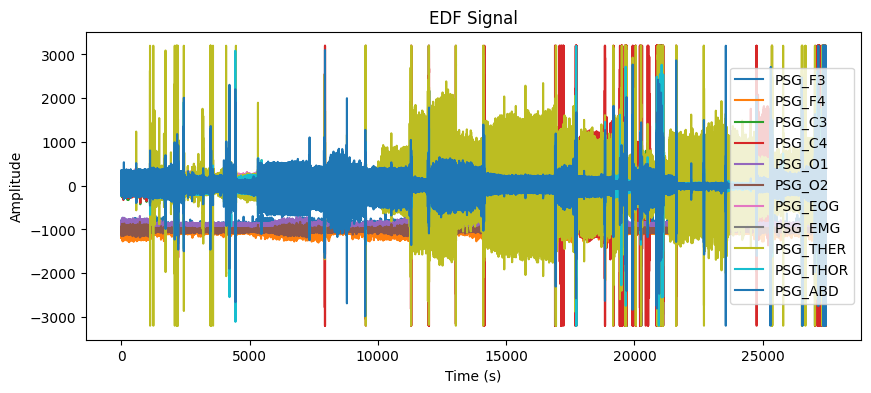

In [7]:
# Reading EEG signal from an EDF file
edf_file_path = "/Users/alicia/Documents/Master/TFM/learnable-masks-explainability-time-series/data/bitbrain/sub-1/eeg/sub-1_task-Sleep_acq-psg_eeg.edf"
plot_eeg_signals(edf_file_path)

In [ ]:
# Function to read and plot an EDF signal
def plot_eeg_signal(edf_file, channel=0, duration=10):
    """
    Reads an EDF file and plots a specified channel in the time domain.

    :param edf_file: Path to the EDF file
    :param channel: Index of the channel to plot (default: 0)
    :param duration: Duration of signal to plot in seconds (default: 10)
    """
    # Open the EDF file
    with pyedflib.EdfReader(edf_file) as f:
        num_signals = f.signals_in_file  # Number of signals in file
        signal_labels = f.getSignalLabels()  # Get channel names
        fs = f.getSampleFrequency(channel)  # Sampling frequency of the channel
        signal = f.readSignal(channel)  # Read the full signal
        print(f"Number of signals {num_signals}")
        print(f"Signal labels: {signal_labels}")
        print(f"Sampling frequency: {fs} Hz")

    # Generate time vector
    total_samples = len(signal)
    total_time = total_samples / fs  # Total duration in seconds
    print(f"total time {total_time}")
    time = np.linspace(0, total_time, total_samples)

    plot_samples = int(duration * fs)

    plt.figure(figsize=(10, 4))
    plt.plot(time, signal, label=signal_labels[channel])
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.title(f"EDF Signal - {signal_labels[channel]}")
    plt.legend()
    plt.grid()
    plt.show()

    # return the signal and the time vector
    return signal, time, plot_samples


Number of signals 11
Signal labels: ['PSG_F3', 'PSG_F4', 'PSG_C3', 'PSG_C4', 'PSG_O1', 'PSG_O2', 'PSG_EOG', 'PSG_EMG', 'PSG_THER', 'PSG_THOR', 'PSG_ABD']
total time 27459.0


/Users/alicia/Documents/Master/TFM/learnable-masks-explainability-time-series/.env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


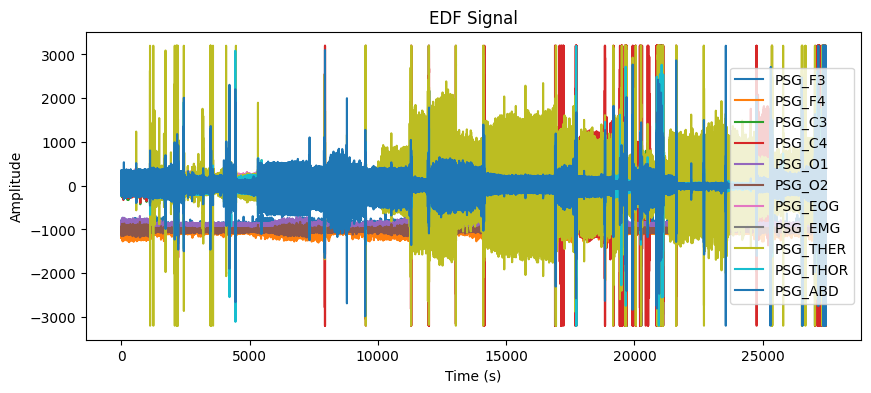

TypeError: plot_eeg_signal() missing 1 required positional argument: 'hypnogram'

In [9]:
# Reading EEG signal from an EDF file
edf_file_path = "/Users/alicia/Documents/Master/TFM/learnable-masks-explainability-time-series/data/bitbrain/sub-1/eeg/sub-1_task-Sleep_acq-psg_eeg.edf"
plot_eeg_signals(edf_file_path)
# edf_file_path = "./sub-1_task-Sleep_acq-psg_eeg.edf" 
signal, time, plot_samples = plot_eeg_signal(edf_file_path, channel=0, duration=30)

In [16]:
print(plot_samples)
print(signal.shape)
print(time.shape)

7680
(7029504,)
(7029504,)


In [ ]:
# compute morlet CWT of the signal read from the EDF file
def compute_cwt(signal, fs, scales):
    """
    Computes the continuous wavelet transform (CWT) of a signal.

    :param signal: Input signal
    :param fs: Sampling frequency of the signal
    :param scales: Scales to use in the CWT
    :return: CWT coefficients
    """
    # Compute the CWT
    coeffs, freq = pywt.cwt(data=signal, scales=scales, wavelet="morl", sampling_period=1/fs)
    duration = 30  # Duration of signal to plot in seconds

    # plot the cwt
    plt.figure(figsize=(10, 6))
    plt.imshow(np.abs(freq), aspect="auto", extent=[0, 30, scales[-1], scales[0]], cmap="jet")
    plt.colorbar(label="Magnitude")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.title("Continuous Wavelet Transform")
    plt.show()



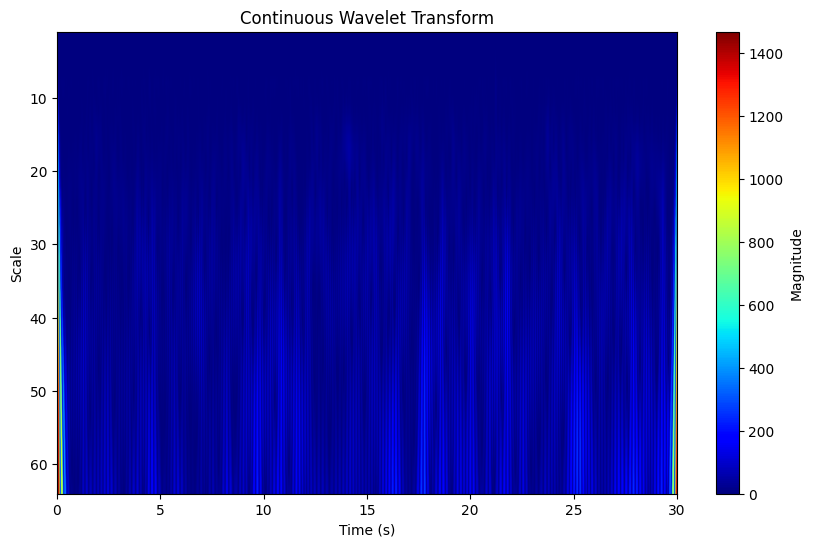

In [18]:
# compute the CWT of the signal
fs = 256  # Sampling frequency of the signal
scales = np.linspace(1, 64, 50) # Scales for the CWT to prevent kernel crash
# scales = np.arange(1, 128)  # Scales for the CWT
compute_cwt(signal[:plot_samples], fs, scales)